In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

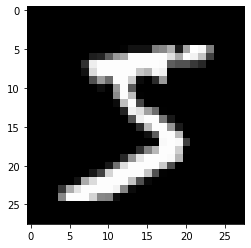

In [3]:
test_dataset = MNIST(root='data/', train=False)

# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

img_tensor, label = dataset[0]
plt.imshow(img_tensor[0], cmap='gray')

In [4]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [5]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [6]:
input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[-0.0234, -0.0152, -0.0091,  ...,  0.0156, -0.0248, -0.0118],
         [-0.0159, -0.0257, -0.0232,  ..., -0.0152,  0.0056,  0.0202],
         [ 0.0153,  0.0269, -0.0329,  ...,  0.0317, -0.0044,  0.0104],
         ...,
         [-0.0344, -0.0035, -0.0007,  ..., -0.0069, -0.0292, -0.0355],
         [ 0.0207,  0.0122, -0.0267,  ..., -0.0012,  0.0070,  0.0134],
         [-0.0352,  0.0313,  0.0168,  ..., -0.0118, -0.0084,  0.0141]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0188,  0.0014, -0.0209, -0.0226,  0.0180,  0.0094,  0.0062,  0.0203,
          0.0201, -0.0027], requires_grad=True)]

In [49]:
for images, labels in train_loader:
    print(images.shape)
    break

torch.Size([128, 1, 28, 28])


In [53]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        print(xb)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [54]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [55]:
print(model.linear.weight.shape, model.linear.bias.shape)

torch.Size([10, 784]) torch.Size([10])
